### Importing Required Modules

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier

## Import Dataset

In [2]:
df = pd.read_csv("CKDCustom.csv", na_values="?")
df.head(10)

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
0,48.0,50,1.020,4,0,1,1.0,0.0,0.0,121.0,...,44.0,6000,4.71,1.0,1,0.0,1.0,0.0,0.0,1
1,7.0,80,1.010,2,0,1,1.0,0.0,0.0,NaN,...,38.0,7500,4.71,0.0,0,0.0,1.0,0.0,0.0,1
2,62.0,70,1.005,4,3,1,1.0,0.0,0.0,423.0,...,31.0,6700,3.90,1.0,1,0.0,0.0,0.0,1.0,1
3,48.0,80,1.010,2,0,1,0.0,1.0,0.0,117.0,...,32.0,7300,4.60,0.0,0,0.0,0.0,1.0,1.0,1
4,51.0,90,1.015,3,0,1,1.0,0.0,0.0,106.0,...,35.0,7800,4.40,1.0,0,0.0,1.0,0.0,0.0,1
5,60.0,70,1.010,0,0,1,NaN,0.0,0.0,74.0,...,39.0,8406,4.71,0.0,1,0.0,1.0,1.0,0.0,1
6,68.0,76,1.015,2,4,1,1.0,0.0,0.0,100.0,...,36.0,6900,5.00,1.0,0,0.0,1.0,0.0,0.0,1
7,24.0,100,1.015,3,0,1,0.0,0.0,0.0,410.0,...,44.0,9600,4.00,1.0,1,0.0,1.0,1.0,0.0,1
8,52.0,90,1.020,2,0,0,0.0,1.0,0.0,138.0,...,33.0,12100,3.70,1.0,1,0.0,1.0,0.0,1.0,1
9,53.0,60,1.010,2,4,1,0.0,1.0,0.0,70.0,...,29.0,8406,4.71,1.0,1,0.0,0.0,0.0,1.0,1


## Data Pre Processing

### Deal with Null Values

In [3]:
df.replace("?", np.NaN)
df.head(10)

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
0,48.0,50,1.020,4,0,1,1.0,0.0,0.0,121.0,...,44.0,6000,4.71,1.0,1,0.0,1.0,0.0,0.0,1
1,7.0,80,1.010,2,0,1,1.0,0.0,0.0,NaN,...,38.0,7500,4.71,0.0,0,0.0,1.0,0.0,0.0,1
2,62.0,70,1.005,4,3,1,1.0,0.0,0.0,423.0,...,31.0,6700,3.90,1.0,1,0.0,0.0,0.0,1.0,1
3,48.0,80,1.010,2,0,1,0.0,1.0,0.0,117.0,...,32.0,7300,4.60,0.0,0,0.0,0.0,1.0,1.0,1
4,51.0,90,1.015,3,0,1,1.0,0.0,0.0,106.0,...,35.0,7800,4.40,1.0,0,0.0,1.0,0.0,0.0,1
5,60.0,70,1.010,0,0,1,NaN,0.0,0.0,74.0,...,39.0,8406,4.71,0.0,1,0.0,1.0,1.0,0.0,1
6,68.0,76,1.015,2,4,1,1.0,0.0,0.0,100.0,...,36.0,6900,5.00,1.0,0,0.0,1.0,0.0,0.0,1
7,24.0,100,1.015,3,0,1,0.0,0.0,0.0,410.0,...,44.0,9600,4.00,1.0,1,0.0,1.0,1.0,0.0,1
8,52.0,90,1.020,2,0,0,0.0,1.0,0.0,138.0,...,33.0,12100,3.70,1.0,1,0.0,1.0,0.0,1.0,1
9,53.0,60,1.010,2,4,1,0.0,1.0,0.0,70.0,...,29.0,8406,4.71,1.0,1,0.0,0.0,0.0,1.0,1


In [4]:
df.isna().sum()

Age       234
Bp          0
Sg          0
Al          0
Su          0
Rbc         0
Pc       1672
Pcc       100
Ba        100
Bgr      1142
Bu          0
Sc          0
Sod        74
Pot         0
Hemo        0
Pcv      1845
Wbcc        0
Rbcc        0
Htn         0
Dm          0
Cad        52
Appet      26
pe         26
Ane        26
Class       0
dtype: int64

In [5]:
df.shape

(10321, 25)

In [6]:
Age = df['Age'].isna().sum()*(100/10321)
Bp = df['Bp'].isna().sum()*(100/10321)
Sg = df['Sg'].isna().sum()*(100/10321)
Al = df['Al'].isna().sum()*(100/10321)
Su = df['Su'].isna().sum()*(100/10321)
Rbc = df['Rbc'].isna().sum()*(100/10321)
Pc = df['Pc'].isna().sum()*(100/10321)
Pcc = df['Pcc'].isna().sum()*(100/10321)
Ba = df['Ba'].isna().sum()*(100/10321)
Bgr = df['Bgr'].isna().sum()*(100/10321)
Bu = df['Bu'].isna().sum()*(100/10321)
Sc = df['Sc'].isna().sum()*(100/10321)
Sod = df['Sod'].isna().sum()*(100/10321)
Pot = df['Pot'].isna().sum()*(100/10321)
Hemo = df['Hemo'].isna().sum()*(100/10321)
Pcv = df['Pcv'].isna().sum()*(100/10321)
Wbcc = df['Wbcc'].isna().sum()*(100/10321)
Rbcc = df['Rbcc'].isna().sum()*(100/10321)
Htn = df['Htn'].isna().sum()*(100/10321)
Dm = df['Dm'].isna().sum()*(100/10321)
Cad = df['Cad'].isna().sum()*(100/10321)
Appet = df['Appet'].isna().sum()*(100/10321)
pe = df['pe'].isna().sum()*(100/10321)
Ane = df['Ane'].isna().sum()*(100/10321)
Class = df['Class'].isna().sum()*(100/10321)

In [7]:
Null_Percentage = pd.DataFrame({
    'Attribute': ['Age' , 'Blood Pressure' , 'Specific Gravity' , 'Albumin' , 'Sugar' , 'Red Blood Cells' , 'Pus Cell' , 'Pus Cell Clumps' , 'Bacteria' , 'Blood Glucose Random' , 'Blood Urea' , 'Serum Creatinine' , 'Sodium' , 'Potassium' , 'Hemoglobin' , 'Packed Cell Volume' , 'White Blood Cell Count' , 'Red Blood Cell Count' , 'Hypertension' , 'Diabetes Mellitus' , 'Coronary Artery Disease' , 'Appetite' , 'Pedal Edema' , 'Anemia' , 'Class'],
    'Missing Values (%)' : [(round(Age, 2)) ,(round(Bp, 2)) ,(round(Sg, 2)),(round(Al, 2)) ,(round(Su, 2)) ,(round(Rbc, 2)) ,(round(Pc, 2)) ,(round(Pcc, 2)) ,(round(Ba, 2)) ,(round(Bgr, 2)) ,(round(Bu, 2)) ,(round(Sc, 2)) ,(round(Sod, 2)) ,(round(Pot, 2)) ,(round(Hemo, 2)) ,(round(Pcv, 2)) ,(round(Wbcc, 2)) ,(round(Rbcc, 2)) ,(round(Htn, 2)) ,(round(Dm, 2)) ,(round(Cad, 2)) ,(round(Appet, 2)) ,(round(pe, 2)) ,(round(Ane, 2)) ,(round(Class, 2))]
})
Null_Percentage.to_csv (r'C:\Users\mdmos\Machine Learning\CKD\Main CKD Implementation\Null_Percentage.csv', index = False, header=True)
Null_Percentage.sort_values(by = 'Attribute', ascending = True)

,Attribute,Missing Values (%)
0,Age,2.27
3,Albumin,0.00
23,Anemia,0.25
21,Appetite,0.25
8,Bacteria,0.97
9,Blood Glucose Random,11.06
1,Blood Pressure,0.00
10,Blood Urea,0.00
24,Class,0.00
20,Coronary Artery Disease,0.50


In [8]:
df.fillna(round(df.mean(),2), inplace=True)
df.head(10)

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
0,48.0,50,1.020,4,0,1,1.00,0.0,0.0,121.0,...,44.0,6000,4.71,1.0,1,0.0,1.0,0.0,0.0,1
1,7.0,80,1.010,2,0,1,1.00,0.0,0.0,148.4,...,38.0,7500,4.71,0.0,0,0.0,1.0,0.0,0.0,1
2,62.0,70,1.005,4,3,1,1.00,0.0,0.0,423.0,...,31.0,6700,3.90,1.0,1,0.0,0.0,0.0,1.0,1
3,48.0,80,1.010,2,0,1,0.00,1.0,0.0,117.0,...,32.0,7300,4.60,0.0,0,0.0,0.0,1.0,1.0,1
4,51.0,90,1.015,3,0,1,1.00,0.0,0.0,106.0,...,35.0,7800,4.40,1.0,0,0.0,1.0,0.0,0.0,1
5,60.0,70,1.010,0,0,1,0.76,0.0,0.0,74.0,...,39.0,8406,4.71,0.0,1,0.0,1.0,1.0,0.0,1
6,68.0,76,1.015,2,4,1,1.00,0.0,0.0,100.0,...,36.0,6900,5.00,1.0,0,0.0,1.0,0.0,0.0,1
7,24.0,100,1.015,3,0,1,0.00,0.0,0.0,410.0,...,44.0,9600,4.00,1.0,1,0.0,1.0,1.0,0.0,1
8,52.0,90,1.020,2,0,0,0.00,1.0,0.0,138.0,...,33.0,12100,3.70,1.0,1,0.0,1.0,0.0,1.0,1
9,53.0,60,1.010,2,4,1,0.00,1.0,0.0,70.0,...,29.0,8406,4.71,1.0,1,0.0,0.0,0.0,1.0,1


In [9]:
df.describe()

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
count,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,...,10321.000000,10321.000000,10321.00000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000
mean,51.514615,79.623389,1.017653,1.015212,0.395020,0.880632,0.760752,0.119174,0.056196,148.401105,...,38.746028,8403.405872,4.85450,0.365201,0.345122,0.086104,0.792902,0.191933,0.151526,0.622130
std,16.948027,70.390247,0.005366,1.274018,1.034319,0.324237,0.390480,0.322427,0.229122,74.866057,...,8.085167,2534.277969,2.80735,0.480289,0.475431,0.279795,0.404730,0.393347,0.358130,0.484878
min,2.000000,0.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.10000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,1.000000,0.760000,0.000000,0.000000,101.000000,...,34.000000,7000.000000,4.50000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,76.000000,1.020000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,127.000000,...,38.750000,8406.000000,4.71000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,150.000000,...,44.000000,9400.000000,5.10000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,1400.000000,1.026000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,58.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10321 entries, 0 to 10320
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     10321 non-null  float64
 1   Bp      10321 non-null  int64  
 2   Sg      10321 non-null  float64
 3   Al      10321 non-null  int64  
 4   Su      10321 non-null  int64  
 5   Rbc     10321 non-null  int64  
 6   Pc      10321 non-null  float64
 7   Pcc     10321 non-null  float64
 8   Ba      10321 non-null  float64
 9   Bgr     10321 non-null  float64
 10  Bu      10321 non-null  float64
 11  Sc      10321 non-null  float64
 12  Sod     10321 non-null  float64
 13  Pot     10321 non-null  float64
 14  Hemo    10321 non-null  float64
 15  Pcv     10321 non-null  float64
 16  Wbcc    10321 non-null  int64  
 17  Rbcc    10321 non-null  float64
 18  Htn     10321 non-null  float64
 19  Dm      10321 non-null  int64  
 20  Cad     10321 non-null  float64
 21  Appet   10321 non-null  float64
 22

In [11]:
df = df[['Age', 'Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Pc', 'Pcc', 'Ba','Bgr', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Pcv', 'Wbcc', 'Rbcc', 'Htn', 'Dm', 'Cad', 'Appet', 'pe', 'Ane', 'Class']]
df['Class'] = df['Class'].astype('int')
df.head(10)

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
0,48.0,50,1.020,4,0,1,1.00,0.0,0.0,121.0,...,44.0,6000,4.71,1.0,1,0.0,1.0,0.0,0.0,1
1,7.0,80,1.010,2,0,1,1.00,0.0,0.0,148.4,...,38.0,7500,4.71,0.0,0,0.0,1.0,0.0,0.0,1
2,62.0,70,1.005,4,3,1,1.00,0.0,0.0,423.0,...,31.0,6700,3.90,1.0,1,0.0,0.0,0.0,1.0,1
3,48.0,80,1.010,2,0,1,0.00,1.0,0.0,117.0,...,32.0,7300,4.60,0.0,0,0.0,0.0,1.0,1.0,1
4,51.0,90,1.015,3,0,1,1.00,0.0,0.0,106.0,...,35.0,7800,4.40,1.0,0,0.0,1.0,0.0,0.0,1
5,60.0,70,1.010,0,0,1,0.76,0.0,0.0,74.0,...,39.0,8406,4.71,0.0,1,0.0,1.0,1.0,0.0,1
6,68.0,76,1.015,2,4,1,1.00,0.0,0.0,100.0,...,36.0,6900,5.00,1.0,0,0.0,1.0,0.0,0.0,1
7,24.0,100,1.015,3,0,1,0.00,0.0,0.0,410.0,...,44.0,9600,4.00,1.0,1,0.0,1.0,1.0,0.0,1
8,52.0,90,1.020,2,0,0,0.00,1.0,0.0,138.0,...,33.0,12100,3.70,1.0,1,0.0,1.0,0.0,1.0,1
9,53.0,60,1.010,2,4,1,0.00,1.0,0.0,70.0,...,29.0,8406,4.71,1.0,1,0.0,0.0,0.0,1.0,1


### Define X and Y for Implement Models

In [12]:
X = np.asarray(df[['Age', 'Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Pc', 'Pcc', 'Ba','Bgr', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Pcv', 'Wbcc', 'Rbcc', 'Htn', 'Dm', 'Cad', 'Appet', 'pe', 'Ane']])
X[0:5]

array([[4.8000e+01, 5.0000e+01, 1.0200e+00, 4.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.2100e+02,
        1.8000e+01, 1.2000e+00, 1.3753e+02, 4.6300e+00, 1.1300e+01,
        4.4000e+01, 6.0000e+03, 4.7100e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00],
       [7.0000e+00, 8.0000e+01, 1.0100e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.4840e+02,
        5.3000e+01, 8.0000e-01, 1.3753e+02, 4.6300e+00, 9.6000e+00,
        3.8000e+01, 7.5000e+03, 4.7100e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00],
       [6.2000e+01, 7.0000e+01, 1.0050e+00, 4.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 4.2300e+02,
        5.6000e+01, 1.8000e+00, 1.3753e+02, 4.6300e+00, 1.1200e+01,
        3.1000e+01, 6.7000e+03, 3.9000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
       [4.800

In [13]:
y = np.asarray(df['Class'])
y[0:5]

array([1, 1, 1, 1, 1])

### Normalize Dataset

In [14]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-2.07386096e-01, -4.20865468e-01,  4.37455312e-01,
         2.34292877e+00, -3.81931407e-01,  3.68169071e-01,
         6.12732660e-01, -3.69635465e-01, -2.45279430e-01,
        -3.66019438e-01, -8.00563357e-01, -3.46683075e-01,
        -7.46672415e-02,  2.70190603e-01, -4.11201276e-01,
         6.49860071e-01, -9.48405164e-01, -5.14743698e-02,
         1.32176709e+00,  1.37750843e+00, -3.07754995e-01,
         5.11719252e-01, -4.87971618e-01, -4.23123847e-01],
       [-2.62666396e+00,  5.35058554e-03, -1.42608121e+00,
         7.73015907e-01, -3.81931407e-01,  3.68169071e-01,
         6.12732660e-01, -3.69635465e-01, -2.45279430e-01,
        -1.47543185e-05, -9.52820440e-02, -4.21996414e-01,
        -7.46672415e-02,  2.70190603e-01, -1.01282485e+00,
        -9.22756060e-02, -3.56491928e-01, -5.14743698e-02,
        -7.60415122e-01, -7.25948370e-01, -3.07754995e-01,
         5.11719252e-01, -4.87971618e-01, -4.23123847e-01],
       [ 6.18708784e-01, -1.36721432e-01, -2.35784946e

## Spliting for Train & Test Dataset

In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8256, 24) (8256,)
Test set: (2065, 24) (2065,)


## Logistic Regression

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_lr = logreg.predict(X_test)
acc_log = round(logreg.score(X_test,y_test) * 100, 2)
print("Logistic Regression Accuracy: ", acc_log)

Logistic Regression Accuracy:  94.04


In [17]:
cvs_lr = round((cross_val_score(logreg, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_lr)

Cross Validated Score: 94.1


In [18]:
class_report = classification_report(y_test, Y_pred_lr)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       772
           1       0.95      0.96      0.95      1293

    accuracy                           0.94      2065
   macro avg       0.94      0.93      0.94      2065
weighted avg       0.94      0.94      0.94      2065



Text(0.5, 1.05, 'Confusion Matrix (Logistic Regression)')

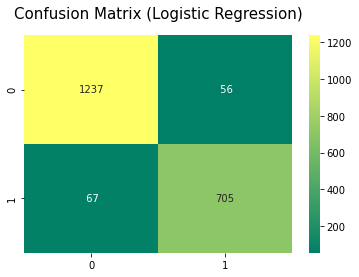

In [19]:
cnf_matrix = confusion_matrix(y_test, Y_pred_lr, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Logistic Regression)', y=1.05, size=15)

In [20]:
jac_score_logreg = round(jaccard_score(y_test, Y_pred_lr, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_logreg)

Jaccard Score:  85.14


Attribute: 0, Score: 0.07557
Attribute: 1, Score: 0.04297
Attribute: 2, Score: -0.01694
Attribute: 3, Score: 0.03239
Attribute: 4, Score: 0.00864
Attribute: 5, Score: -0.02106
Attribute: 6, Score: 0.02850
Attribute: 7, Score: -0.00889
Attribute: 8, Score: 0.03948
Attribute: 9, Score: -0.04264
Attribute: 10, Score: -0.07015
Attribute: 11, Score: -0.01995
Attribute: 12, Score: -0.00714
Attribute: 13, Score: 0.02034
Attribute: 14, Score: -3.32391
Attribute: 15, Score: -0.08325
Attribute: 16, Score: 0.05221
Attribute: 17, Score: -4.10634
Attribute: 18, Score: 2.98574
Attribute: 19, Score: 0.15624
Attribute: 20, Score: 0.07053
Attribute: 21, Score: -0.00920
Attribute: 22, Score: -0.06433
Attribute: 23, Score: 0.03380


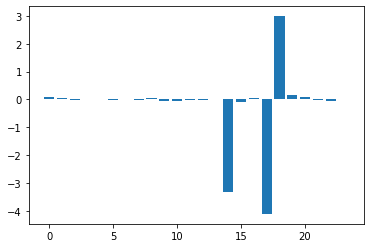

Standard Daviation of Feature Importance 1.23


In [21]:
importance_lr = logreg.coef_[0]
for i,v in enumerate(importance_lr):
    print('Attribute: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance_lr))], importance_lr)
plt.show()
std_lr = round(np.std(importance_lr), 2)
print("Standard Daviation of Feature Importance", std_lr)

## Support Vector Machines

In [22]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred_svm = svc.predict(X_test)
acc_svc = round(svc.score(X_test,y_test) * 100, 2)
print("Support Vector Machines Accuracy: ", acc_svc)

Support Vector Machines Accuracy:  93.46


In [23]:
cvs_svm = round((cross_val_score(svc, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_svm)

Cross Validated Score: 93.53


In [24]:
class_report = classification_report(y_test, Y_pred_svm)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       772
           1       0.95      0.95      0.95      1293

    accuracy                           0.93      2065
   macro avg       0.93      0.93      0.93      2065
weighted avg       0.93      0.93      0.93      2065



Text(0.5, 1.05, 'Confusion Matrix (Support Vector Machines)')

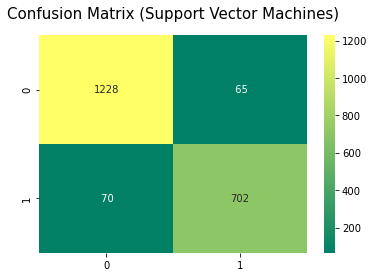

In [25]:
cnf_matrix = confusion_matrix(y_test, Y_pred_svm, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Support Vector Machines)', y=1.05, size=15)

In [26]:
jac_score_svm = round(jaccard_score(y_test, Y_pred_svm, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_svm)

Jaccard Score:  83.87


### K - Nearest Neighbours

In [27]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_test,y_test) * 100, 2)
print("K - Nearest Neighbours Accuracy: ", acc_knn)

K - Nearest Neighbours Accuracy:  88.62


In [28]:
cvs_knn = round((cross_val_score(knn, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_knn)

Cross Validated Score: 87.71


In [29]:
class_report = classification_report(y_test, Y_pred_knn)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       772
           1       0.92      0.89      0.91      1293

    accuracy                           0.89      2065
   macro avg       0.88      0.88      0.88      2065
weighted avg       0.89      0.89      0.89      2065



Text(0.5, 1.05, 'Confusion Matrix (K - Nearest Neighbours)')

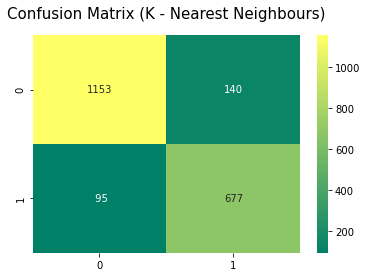

In [30]:
cnf_matrix = confusion_matrix(y_test, Y_pred_knn, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (K - Nearest Neighbours)', y=1.05, size=15)

In [31]:
jac_score_knn = round(jaccard_score(y_test, Y_pred_knn, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_knn)

Jaccard Score:  74.23


## Gaussian Naive Bayes

In [32]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred_gnb = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test,y_test) * 100, 2)
print("Gaussian Naive Bayes Accuracy: ", acc_gaussian)

Gaussian Naive Bayes Accuracy:  86.0


In [33]:
cvs_gnb = round((cross_val_score(gaussian, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_gnb)

Cross Validated Score: 85.45


In [34]:
class_report = classification_report(y_test, Y_pred_gnb)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.75      0.94      0.83       772
           1       0.96      0.81      0.88      1293

    accuracy                           0.86      2065
   macro avg       0.85      0.88      0.86      2065
weighted avg       0.88      0.86      0.86      2065



Text(0.5, 1.05, 'Confusion Matrix (Gaussian Naive Bayes)')

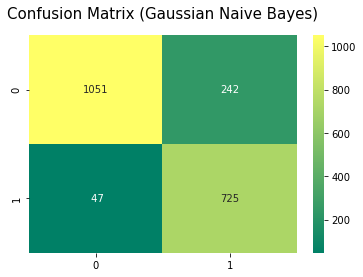

In [35]:
cnf_matrix = confusion_matrix(y_test, Y_pred_gnb, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Gaussian Naive Bayes)', y=1.05, size=15)

In [36]:
jac_score_gaussian = round(jaccard_score(y_test, Y_pred_gnb, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_gaussian)

Jaccard Score:  71.5


## Perceptron

In [37]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred_p = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test,y_test) * 100, 2)
print("Perceptron Accuracy: ", acc_perceptron)

Perceptron Accuracy:  89.06


In [38]:
cvs_p = round((cross_val_score(perceptron, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_p)

Cross Validated Score: 88.65


In [39]:
class_report = classification_report(y_test, Y_pred_p)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       772
           1       0.91      0.92      0.91      1293

    accuracy                           0.89      2065
   macro avg       0.88      0.88      0.88      2065
weighted avg       0.89      0.89      0.89      2065



Text(0.5, 1.05, 'Confusion Matrix (Perceptron)')

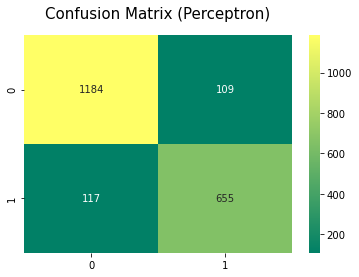

In [40]:
cnf_matrix = confusion_matrix(y_test, Y_pred_p, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Perceptron)', y=1.05, size=15)

In [41]:
jac_score_perceptron = round(jaccard_score(y_test, Y_pred_p, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_perceptron)

Jaccard Score:  74.35


## Linear Support Vector Classification

In [42]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred_lsvc = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test,y_test) * 100, 2)
print("Linear Support Vector Classification Accuracy: ", acc_linear_svc)

Linear Support Vector Classification Accuracy:  93.7


C:\Users\mdmos\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [43]:
cvs_lsvc = round((cross_val_score(linear_svc, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_lsvc)

C:\Users\mdmos\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\mdmos\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\mdmos\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\mdmos\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\mdmos\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Cross Validated Score: 93.81


C:\Users\mdmos\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [44]:
class_report = classification_report(y_test, Y_pred_lsvc)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       772
           1       0.94      0.96      0.95      1293

    accuracy                           0.94      2065
   macro avg       0.93      0.93      0.93      2065
weighted avg       0.94      0.94      0.94      2065



Text(0.5, 1.05, 'Confusion Matrix (Linear Support Vector Classification)')

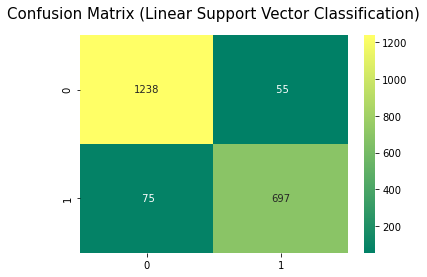

In [45]:
cnf_matrix = confusion_matrix(y_test, Y_pred_lsvc, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Linear Support Vector Classification)', y=1.05, size=15)

In [46]:
jac_score_linear_svc = round(jaccard_score(y_test, Y_pred_lsvc, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_linear_svc)

Jaccard Score:  84.28


## Stochastic Gradient Descent

In [47]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred_sgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test,y_test) * 100, 2)
print("Stochastic Gradient Descent Accuracy: ", acc_sgd)

Stochastic Gradient Descent Accuracy:  93.95


In [48]:
cvs_sgd = round((cross_val_score(sgd, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_sgd)

Cross Validated Score: 93.34


In [49]:
class_report = classification_report(y_test, Y_pred_sgd)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       772
           1       0.95      0.95      0.95      1293

    accuracy                           0.94      2065
   macro avg       0.94      0.94      0.94      2065
weighted avg       0.94      0.94      0.94      2065



Text(0.5, 1.05, 'Confusion Matrix (Stochastic Gradient Descent)')

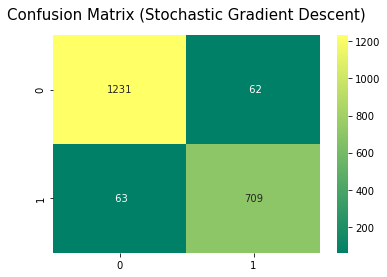

In [50]:
cnf_matrix = confusion_matrix(y_test, Y_pred_sgd, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Stochastic Gradient Descent)', y=1.05, size=15)

In [51]:
jac_score_sgd = round(jaccard_score(y_test, Y_pred_sgd, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_sgd)

Jaccard Score:  85.01


## Decision Tree

In [52]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_dt = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test,y_test) * 100, 2)
print("Decision Tree Accuracy: ", acc_decision_tree)

Decision Tree Accuracy:  98.11


In [53]:
cvs_dt = round((cross_val_score(decision_tree, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_dt)

Cross Validated Score: 98.54


In [54]:
class_report = classification_report(y_test, Y_pred_dt)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       772
           1       0.99      0.98      0.98      1293

    accuracy                           0.98      2065
   macro avg       0.98      0.98      0.98      2065
weighted avg       0.98      0.98      0.98      2065



Text(0.5, 1.05, 'Confusion Matrix (Decision Tree)')

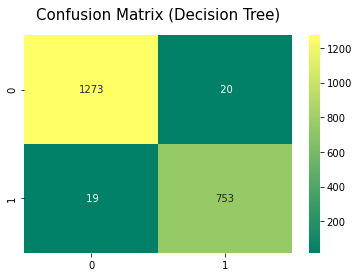

In [55]:
cnf_matrix = confusion_matrix(y_test, Y_pred_dt, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Decision Tree)', y=1.05, size=15)

In [56]:
jac_score_dt = round(jaccard_score(y_test, Y_pred_dt, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_dt)

Jaccard Score:  95.08


Feature: 0, Score: 0.00479
Feature: 1, Score: 0.00149
Feature: 2, Score: 0.00026
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00071
Feature: 5, Score: 0.00074
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00073
Feature: 9, Score: 0.00282
Feature: 10, Score: 0.00417
Feature: 11, Score: 0.00157
Feature: 12, Score: 0.00368
Feature: 13, Score: 0.00378
Feature: 14, Score: 0.77490
Feature: 15, Score: 0.00617
Feature: 16, Score: 0.04341
Feature: 17, Score: 0.07364
Feature: 18, Score: 0.07549
Feature: 19, Score: 0.00108
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00021
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00034


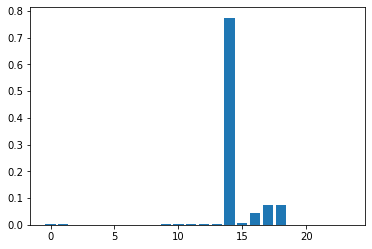

Standard Daviation of Feature Importance 0.15


In [57]:
importance_dt = decision_tree.feature_importances_

for i,v in enumerate(importance_dt):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance_dt))], importance_dt)
plt.show()
std_dt = round(np.std(importance_dt), 2)
print("Standard Daviation of Feature Importance", std_dt)

## Random Forest

In [58]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test,y_test) * 100, 2)
print("Random Forest Accuracy: ", acc_random_forest)

Random Forest Accuracy:  97.09


In [59]:
cvs_rf = round((cross_val_score(random_forest, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_rf)

Cross Validated Score: 97.61


In [60]:
class_report = classification_report(y_test, Y_pred_rf)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       772
           1       0.98      0.98      0.98      1293

    accuracy                           0.97      2065
   macro avg       0.97      0.97      0.97      2065
weighted avg       0.97      0.97      0.97      2065



Text(0.5, 1.05, 'Confusion Matrix (Random Forest)')

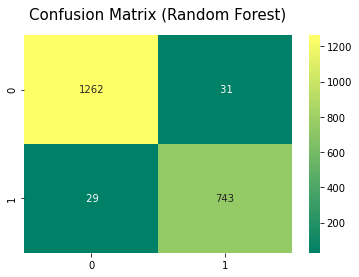

In [61]:
cnf_matrix = confusion_matrix(y_test, Y_pred_rf, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Random Forest)', y=1.05, size=15)

In [62]:
jac_score_rf = round(jaccard_score(y_test, Y_pred_rf, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_rf)

Jaccard Score:  92.53


Feature: 0, Score: 0.01375
Feature: 1, Score: 0.00740
Feature: 2, Score: 0.00541
Feature: 3, Score: 0.00456
Feature: 4, Score: 0.00293
Feature: 5, Score: 0.00153
Feature: 6, Score: 0.00398
Feature: 7, Score: 0.00184
Feature: 8, Score: 0.00141
Feature: 9, Score: 0.01555
Feature: 10, Score: 0.01459
Feature: 11, Score: 0.01183
Feature: 12, Score: 0.01108
Feature: 13, Score: 0.01152
Feature: 14, Score: 0.42411
Feature: 15, Score: 0.01486
Feature: 16, Score: 0.07455
Feature: 17, Score: 0.23253
Feature: 18, Score: 0.13411
Feature: 19, Score: 0.00482
Feature: 20, Score: 0.00195
Feature: 21, Score: 0.00187
Feature: 22, Score: 0.00185
Feature: 23, Score: 0.00199


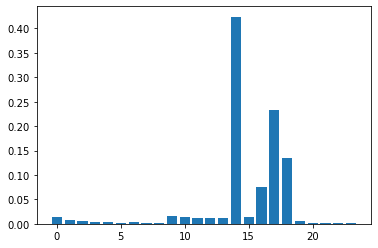

Standard Daviation of Feature Importance 0.1


In [63]:
importance_rf = random_forest.feature_importances_

for i,v in enumerate(importance_rf):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance_rf))], importance_rf)
plt.show()
std_rf = round(np.std(importance_rf), 2)
print("Standard Daviation of Feature Importance", std_rf)

## AdaBoost

In [64]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1)
abc.fit(X_train, y_train)
Y_pred_abc = abc.predict(X_test)
abc_score = round(abc.score(X_test,y_test) * 100, 2)
print("AdaBoost Accuracy: ", abc_score)

AdaBoost Accuracy:  98.11


In [65]:
cvs_abc = round((cross_val_score(abc, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_abc)

Cross Validated Score: 98.12


In [66]:
class_report = classification_report(y_test, Y_pred_abc)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       772
           1       0.98      0.99      0.99      1293

    accuracy                           0.98      2065
   macro avg       0.98      0.98      0.98      2065
weighted avg       0.98      0.98      0.98      2065



Text(0.5, 1.05, 'Confusion Matrix (AdaBoost)')

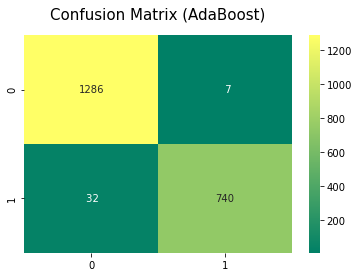

In [67]:
cnf_matrix = confusion_matrix(y_test, Y_pred_abc, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (AdaBoost)', y=1.05, size=15)

In [68]:
jac_score_abc = round(jaccard_score(y_test, Y_pred_abc, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_abc)

Jaccard Score:  94.99


Feature: 0, Score: 0.01000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.02000
Feature: 10, Score: 0.01000
Feature: 11, Score: 0.02000
Feature: 12, Score: 0.01000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.36000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.28000
Feature: 17, Score: 0.27000
Feature: 18, Score: 0.01000
Feature: 19, Score: 0.01000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000


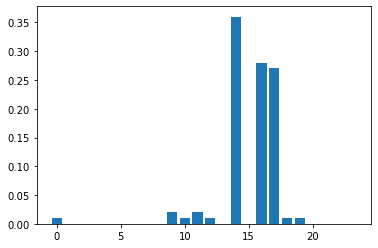

Standard Daviation of Feature Importance 0.1


In [69]:
importance_abc = abc.feature_importances_

for i,v in enumerate(importance_abc):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance_abc))], importance_abc)
plt.show()
std_abc = round(np.std(importance_abc), 2)
print("Standard Daviation of Feature Importance", std_abc)

## XGBoost

In [70]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
Y_pred_xgb = xgb.predict(X_test)
XGB_score = round(xgb.score(X_test,y_test) * 100, 2)
print("XGBoost Accuracy: ", XGB_score)

[18:25:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mdmos\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoost Accuracy:  98.55


In [71]:
cvs_xgb = round((cross_val_score(xgb, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_xgb)

[18:25:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mdmos\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:25:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:25:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:25:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:25:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [72]:
class_report = classification_report(y_test, Y_pred_xgb)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       772
           1       0.98      1.00      0.99      1293

    accuracy                           0.99      2065
   macro avg       0.99      0.98      0.98      2065
weighted avg       0.99      0.99      0.99      2065



Text(0.5, 1.05, 'Confusion Matrix (XGBoost)')

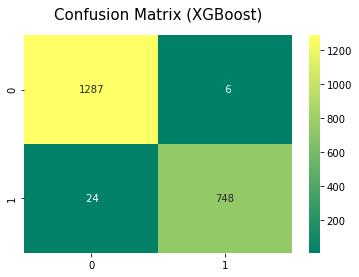

In [73]:
cnf_matrix = confusion_matrix(y_test, Y_pred_xgb, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (XGBoost)', y=1.05, size=15)

In [74]:
jac_score_xgb = round(jaccard_score(y_test, Y_pred_xgb, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_xgb)

Jaccard Score:  96.14


Feature: 0, Score: 0.00524
Feature: 1, Score: 0.00507
Feature: 2, Score: 0.00804
Feature: 3, Score: 0.00522
Feature: 4, Score: 0.01002
Feature: 5, Score: 0.00626
Feature: 6, Score: 0.00649
Feature: 7, Score: 0.00907
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00663
Feature: 10, Score: 0.00649
Feature: 11, Score: 0.00713
Feature: 12, Score: 0.01034
Feature: 13, Score: 0.00671
Feature: 14, Score: 0.36743
Feature: 15, Score: 0.00684
Feature: 16, Score: 0.05247
Feature: 17, Score: 0.07197
Feature: 18, Score: 0.38551
Feature: 19, Score: 0.01044
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00483
Feature: 22, Score: 0.00352
Feature: 23, Score: 0.00430


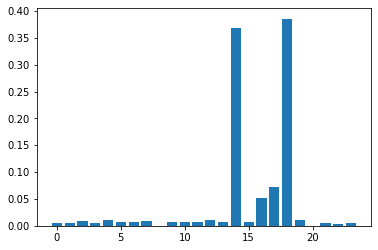

Standard Daviation of Feature Importance 0.1


In [75]:
importance_xgb = xgb.feature_importances_

for i,v in enumerate(importance_xgb):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance_xgb))], importance_xgb)
plt.show()
std_xgb = round(np.std(importance_xgb), 2)
print("Standard Daviation of Feature Importance", std_xgb)

## ROC Curve

In [76]:
auc_lr = roc_auc_score(y_test, Y_pred_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, Y_pred_lr)

auc_svm = roc_auc_score(y_test, Y_pred_svm)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, Y_pred_svm)

auc_knn = roc_auc_score(y_test, Y_pred_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, Y_pred_knn)

auc_gnb = roc_auc_score(y_test, Y_pred_gnb)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, Y_pred_gnb)

auc_p = roc_auc_score(y_test, Y_pred_p)
fpr_p, tpr_p, thresholds_p = roc_curve(y_test, Y_pred_p)

auc_lsvc = roc_auc_score(y_test, Y_pred_lsvc)
fpr_lsvc, tpr_lsvc, thresholds_lsvc = roc_curve(y_test, Y_pred_lsvc)

auc_sgd = roc_auc_score(y_test, Y_pred_sgd)
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, Y_pred_sgd)

auc_dt = roc_auc_score(y_test, Y_pred_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, Y_pred_dt)

auc_rf = roc_auc_score(y_test, Y_pred_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, Y_pred_rf)

auc_abc = roc_auc_score(y_test, Y_pred_abc)
fpr_abc, tpr_abc, thresholds_abc = roc_curve(y_test, Y_pred_abc)

auc_xgb = roc_auc_score(y_test, Y_pred_xgb)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, Y_pred_xgb)

### Plotting

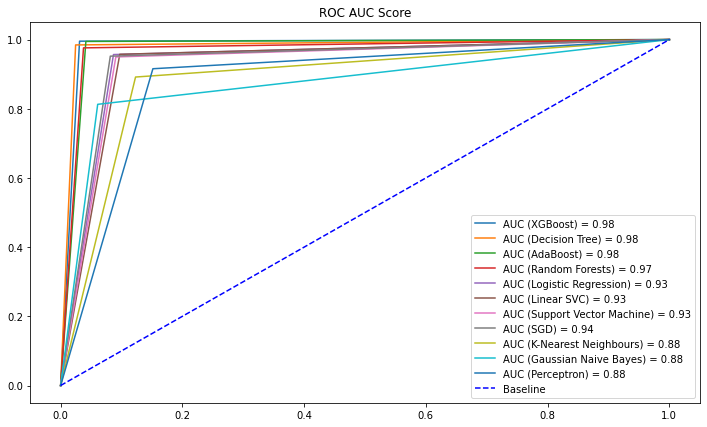

In [77]:
plt.figure(figsize=(12, 7))
plt.plot(fpr_xgb, tpr_xgb, label=f'AUC (XGBoost) = {auc_xgb:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_abc, tpr_abc, label=f'AUC (AdaBoost) = {auc_abc:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_lsvc, tpr_lsvc, label=f'AUC (Linear SVC) = {auc_lsvc:.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'AUC (Support Vector Machine) = {auc_svm:.2f}')
plt.plot(fpr_sgd, tpr_sgd, label=f'AUC (SGD) = {auc_sgd:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (K-Nearest Neighbours) = {auc_knn:.2f}')
plt.plot(fpr_gnb, tpr_gnb, label=f'AUC (Gaussian Naive Bayes) = {auc_gnb:.2f}')
plt.plot(fpr_p, tpr_p, label=f'AUC (Perceptron) = {auc_p:.2f}')

plt.title('ROC AUC Score')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.legend()

## Mean Squared Error and Mean Absolute Error

In [78]:
lr_mae = round((mean_absolute_error(y_test, Y_pred_lr)*100), 2)
lr_mse = round((mean_squared_error(y_test, Y_pred_lr)*100), 2)

svm_mae = round((mean_absolute_error(y_test, Y_pred_svm)*100), 2)
svm_mse = round((mean_squared_error(y_test, Y_pred_svm)*100), 2)

knn_mae = round((mean_absolute_error(y_test, Y_pred_knn)*100), 2)
knn_mse = round((mean_squared_error(y_test, Y_pred_knn)*100), 2)

gnb_mae = round((mean_absolute_error(y_test, Y_pred_gnb)*100), 2)
gnb_mse = round((mean_squared_error(y_test, Y_pred_gnb)*100), 2)

p_mae = round((mean_absolute_error(y_test, Y_pred_p)*100), 2)
p_mse = round((mean_squared_error(y_test, Y_pred_p)*100), 2)

lsvc_mae = round((mean_absolute_error(y_test, Y_pred_lsvc)*100), 2)
lsvc_mse = round((mean_squared_error(y_test, Y_pred_lsvc)*100), 2)

sgd_mae = round((mean_absolute_error(y_test, Y_pred_sgd)*100), 2)
sgd_mse = round((mean_squared_error(y_test, Y_pred_sgd)*100), 2)

dt_mae = round((mean_absolute_error(y_test, Y_pred_dt)*100), 2)
dt_mse = round((mean_squared_error(y_test, Y_pred_dt)*100), 2)

rf_mae = round((mean_absolute_error(y_test, Y_pred_rf)*100), 2)
rf_mse = round((mean_squared_error(y_test, Y_pred_rf)*100), 2)

abc_mae = round((mean_absolute_error(y_test, Y_pred_abc)*100), 2)
abc_mse = round((mean_squared_error(y_test, Y_pred_abc)*100), 2)

xgb_mae = round((mean_absolute_error(y_test, Y_pred_xgb)*100), 2)
xgb_mse = round((mean_squared_error(y_test, Y_pred_xgb)*100), 2)

## Final Table
#### Excluding Feature Importance

In [87]:
models = pd.DataFrame({
    'Algorithm Name': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree','AdaBoost Classifier','XGBoost Classifier'],
    'Accuracy Score (%)': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree, abc_score,XGB_score],
    'Jaccard Score (%)' : [jac_score_svm, jac_score_knn, jac_score_logreg, jac_score_rf, jac_score_gaussian, jac_score_perceptron, jac_score_sgd, jac_score_linear_svc, jac_score_dt, jac_score_abc, jac_score_xgb],
    'Cross Validated Score (%)' : [cvs_svm, cvs_knn, cvs_lr, cvs_rf, cvs_gnb, cvs_p, cvs_sgd, cvs_lsvc, cvs_dt, cvs_abc, cvs_xgb],
    'AUC Score (%)' : [(round(auc_svm*100, 2)), (round(auc_knn*100, 2)), (round(auc_lr*100, 2)), (round(auc_rf*100, 2)), (round(auc_gnb*100, 2)), (round(auc_p*100, 2)), (round(auc_sgd*100, 2)), (round(auc_lsvc*100, 2)), (round(auc_dt*100, 2)), (round(auc_abc*100, 2)), (round(auc_xgb*100, 2))],
    'Misclassification (%)': [(abs(acc_svc-100)), (abs(acc_knn-100)), (abs(acc_log-100)), (abs(acc_random_forest-100)), (abs(acc_gaussian-100)), (abs(acc_perceptron-100)), (abs(acc_sgd-100)), (abs(acc_linear_svc-100)), (abs(acc_decision_tree-100)), (abs(abc_score-100)), (abs(XGB_score-100))],
    'Mean Absolute Error (%)' : [svm_mae, knn_mae, lr_mae, rf_mae, gnb_mae, p_mae, sgd_mae, lsvc_mae, dt_mae, abc_mae, xgb_mae],
    'Mean Squared Error (%)' : [svm_mse, knn_mse, lr_mse, rf_mse, gnb_mse, p_mse, sgd_mse, lsvc_mse, dt_mse, abc_mse, xgb_mse],
    'Standard Deviation' : ['--', '--', std_lr, std_rf, '--', '--', '--', '--', std_dt, std_abc, std_xgb]
})
# models.to_csv (r'C:\Users\mdmos\Machine Learning\CKD\Main CKD Implementation\All_Important_Info_Table.csv', index = False, header=True)
models

,Algorithm Name,Accuracy Score (%),Jaccard Score (%),Cross Validated Score (%),AUC Score (%),Misclassification (%),Mean Absolute Error (%),Mean Squared Error (%),Standard Deviation
0,Support Vector Machines,93.46,83.87,93.53,92.95,6.54,6.54,6.54,--
1,KNN,88.62,74.23,87.71,88.43,11.38,11.38,11.38,--
2,Logistic Regression,94.04,85.14,94.10,93.50,5.96,5.96,5.96,1.23
3,Random Forest,97.09,92.53,97.61,96.92,2.91,2.91,2.91,0.1
4,Naive Bayes,86.00,71.50,85.45,87.60,14.00,14.00,14.00,--
5,Perceptron,89.06,74.35,88.65,88.21,10.94,10.94,10.94,--
6,Stochastic Gradient Decent,93.95,85.01,93.34,93.52,6.05,6.05,6.05,--
7,Linear SVC,93.70,84.28,93.81,93.02,6.30,6.30,6.30,--
8,Decision Tree,98.11,95.08,98.54,98.00,1.89,1.89,1.89,0.15
9,AdaBoost Classifier,98.11,94.99,98.12,97.66,1.89,1.89,1.89,0.1


## Visualizations

In [80]:
Tfont = {'fontname':'Cambria', 'fontsize':20}
Lfont = {'fontname':'Cambria', 'fontsize':16}

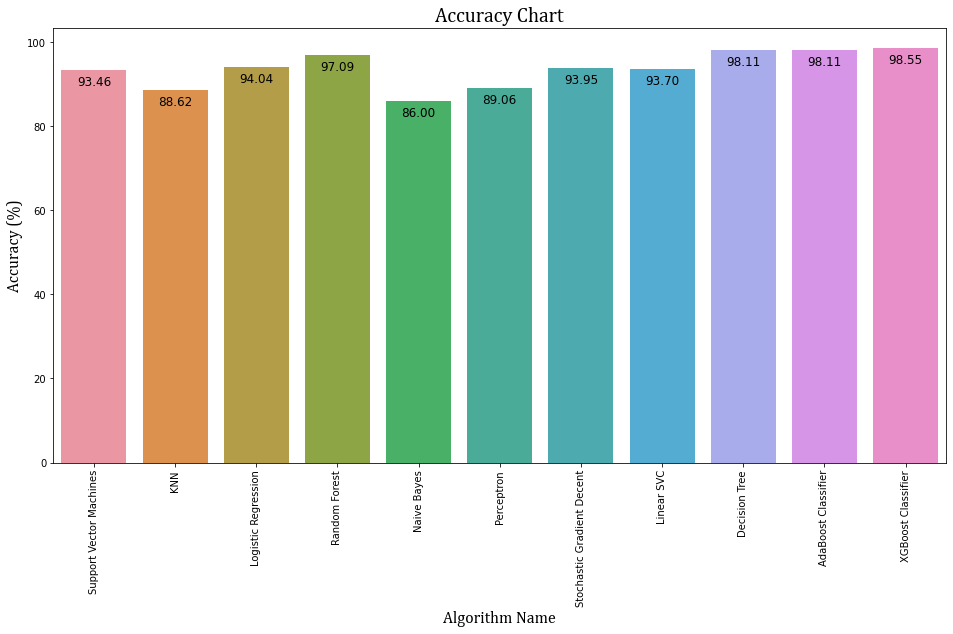

In [81]:
plt.figure(figsize=(16, 8))
splot=sns.barplot(y="Accuracy Score (%)",x="Algorithm Name",data=models)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xticks(rotation=90)

plt.title("Accuracy Chart",**Tfont)
plt.ylabel("Accuracy (%)",**Lfont)
plt.xlabel("Algorithm Name",**Lfont)

plt.show()

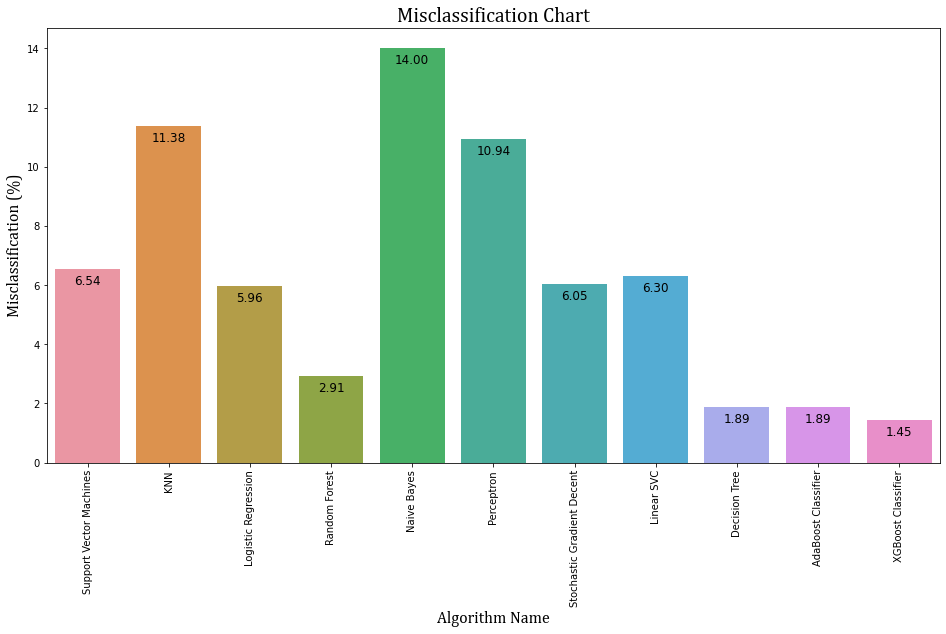

In [82]:
plt.figure(figsize=(16, 8))
splot=sns.barplot(y="Misclassification (%)",x="Algorithm Name",data=models)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xticks(rotation=90)

plt.title("Misclassification Chart",**Tfont)
plt.ylabel("Misclassification (%)",**Lfont)
plt.xlabel("Algorithm Name",**Lfont)

plt.show()

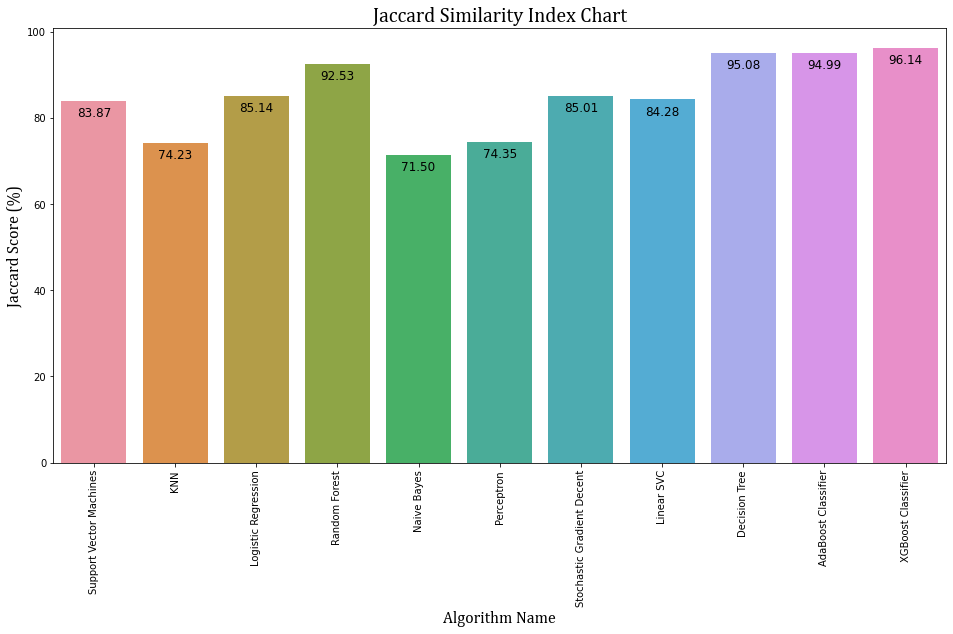

In [83]:
plt.figure(figsize=(16, 8))
splot=sns.barplot(y="Jaccard Score (%)",x="Algorithm Name",data=models)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xticks(rotation=90)

plt.title("Jaccard Similarity Index Chart",**Tfont)
plt.ylabel("Jaccard Score (%)",**Lfont)
plt.xlabel("Algorithm Name",**Lfont)

plt.show()

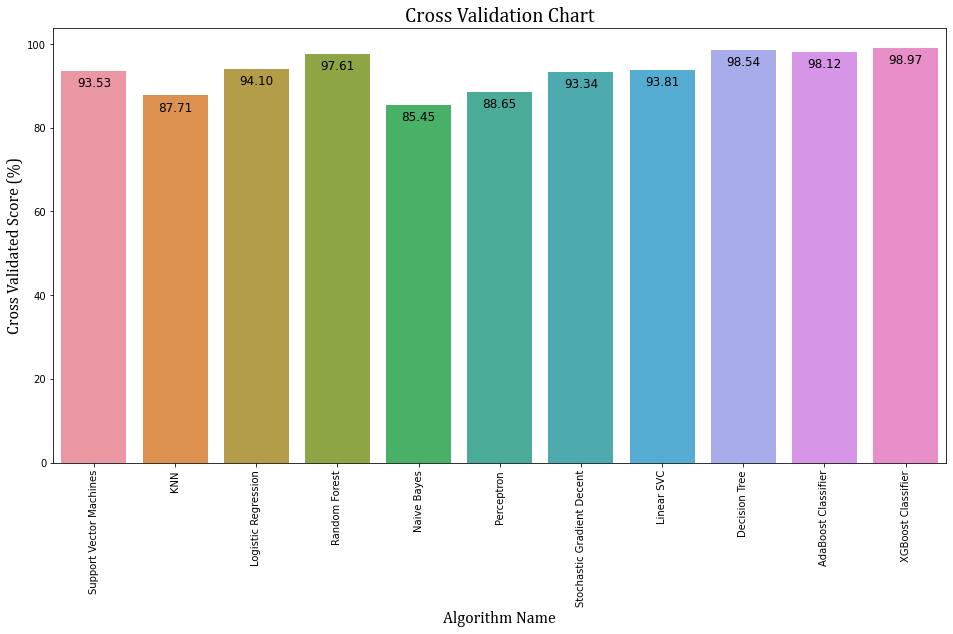

In [84]:
plt.figure(figsize=(16, 8))
splot=sns.barplot(y="Cross Validated Score (%)",x="Algorithm Name",data=models)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xticks(rotation=90)

plt.title("Cross Validation Chart",**Tfont)
plt.ylabel("Cross Validated Score (%)",**Lfont)
plt.xlabel("Algorithm Name",**Lfont)

plt.show()

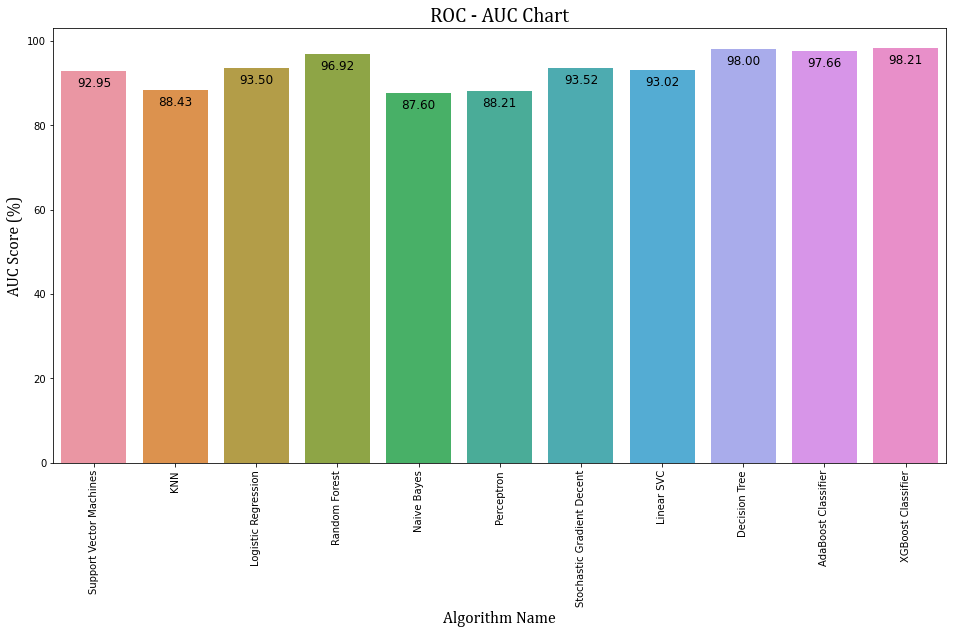

In [85]:
plt.figure(figsize=(16, 8))
splot=sns.barplot(y="AUC Score (%)",x="Algorithm Name",data=models)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xticks(rotation=90)

plt.title("ROC - AUC Chart",**Tfont)
plt.ylabel("AUC Score (%)",**Lfont)
plt.xlabel("Algorithm Name",**Lfont)

plt.show()